In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
plt.style.use(style='fivethirtyeight')
drive.mount('/content/drive')
path_to_data='/content/Walmart.csv'
sales=pd.read_csv(path_to_data)
sales.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# **Data Preperation**

# 1.Duplicate rows





In [79]:
#check duplicates rows
sales.duplicated().sum()

0

# 2.*Shape*

In [80]:
#shape
rows=sales.shape[0]
columns=sales.shape[1]
print(f"There are {rows} rows and {columns} columns")

There are 6435 rows and 8 columns


# *3.Rename columns*

In [81]:
sales.columns=sales.columns.str.lower()
sales.rename({'holiday_flag':'is holiday'},axis=1, inplace=True)
sales.columns

Index(['store', 'date', 'weekly_sales', 'is holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [82]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   is holiday    6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# 4.Missing values

Our dataset is compete, without any missing values.
This data integrity allows us to proceed direclty to the next steps of our analysis without requiring prior processing of missing values.

In [83]:
#count missing value per column
missing_values_count=sales.isnull().sum()
print(missing_values_count)

store           0
date            0
weekly_sales    0
is holiday      0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64


#5.Descriptive statistics


In [84]:
#decribe the data
sales.describe(include='all')

,store,date,weekly_sales,is holiday,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [85]:
def quarter_to_season(quarter):
  if  quarter==1:
    return 'winter'
  elif quarter==2:
    return 'spring'
  elif quarter==3:
    return 'summer'
  else:
    return 'autumn'


In [86]:
#convert 'Date' column to datetime
sales['date']=pd.to_datetime(sales['date'],format='%d-%m-%Y')
sales['year']=sales['date'].dt.year
sales['quarter']=sales['date'].dt.quarter
sales['season']=sales['quarter'].apply(quarter_to_season)
sales['month']=sales['date'].dt.month
sales['day']=sales['date'].dt.day

sales.head()



,store,date,weekly_sales,is holiday,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,winter,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,winter,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,winter,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,winter,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,winter,3,5


# Exploratory Data Analysis (EDA)

# *1.Distribution*

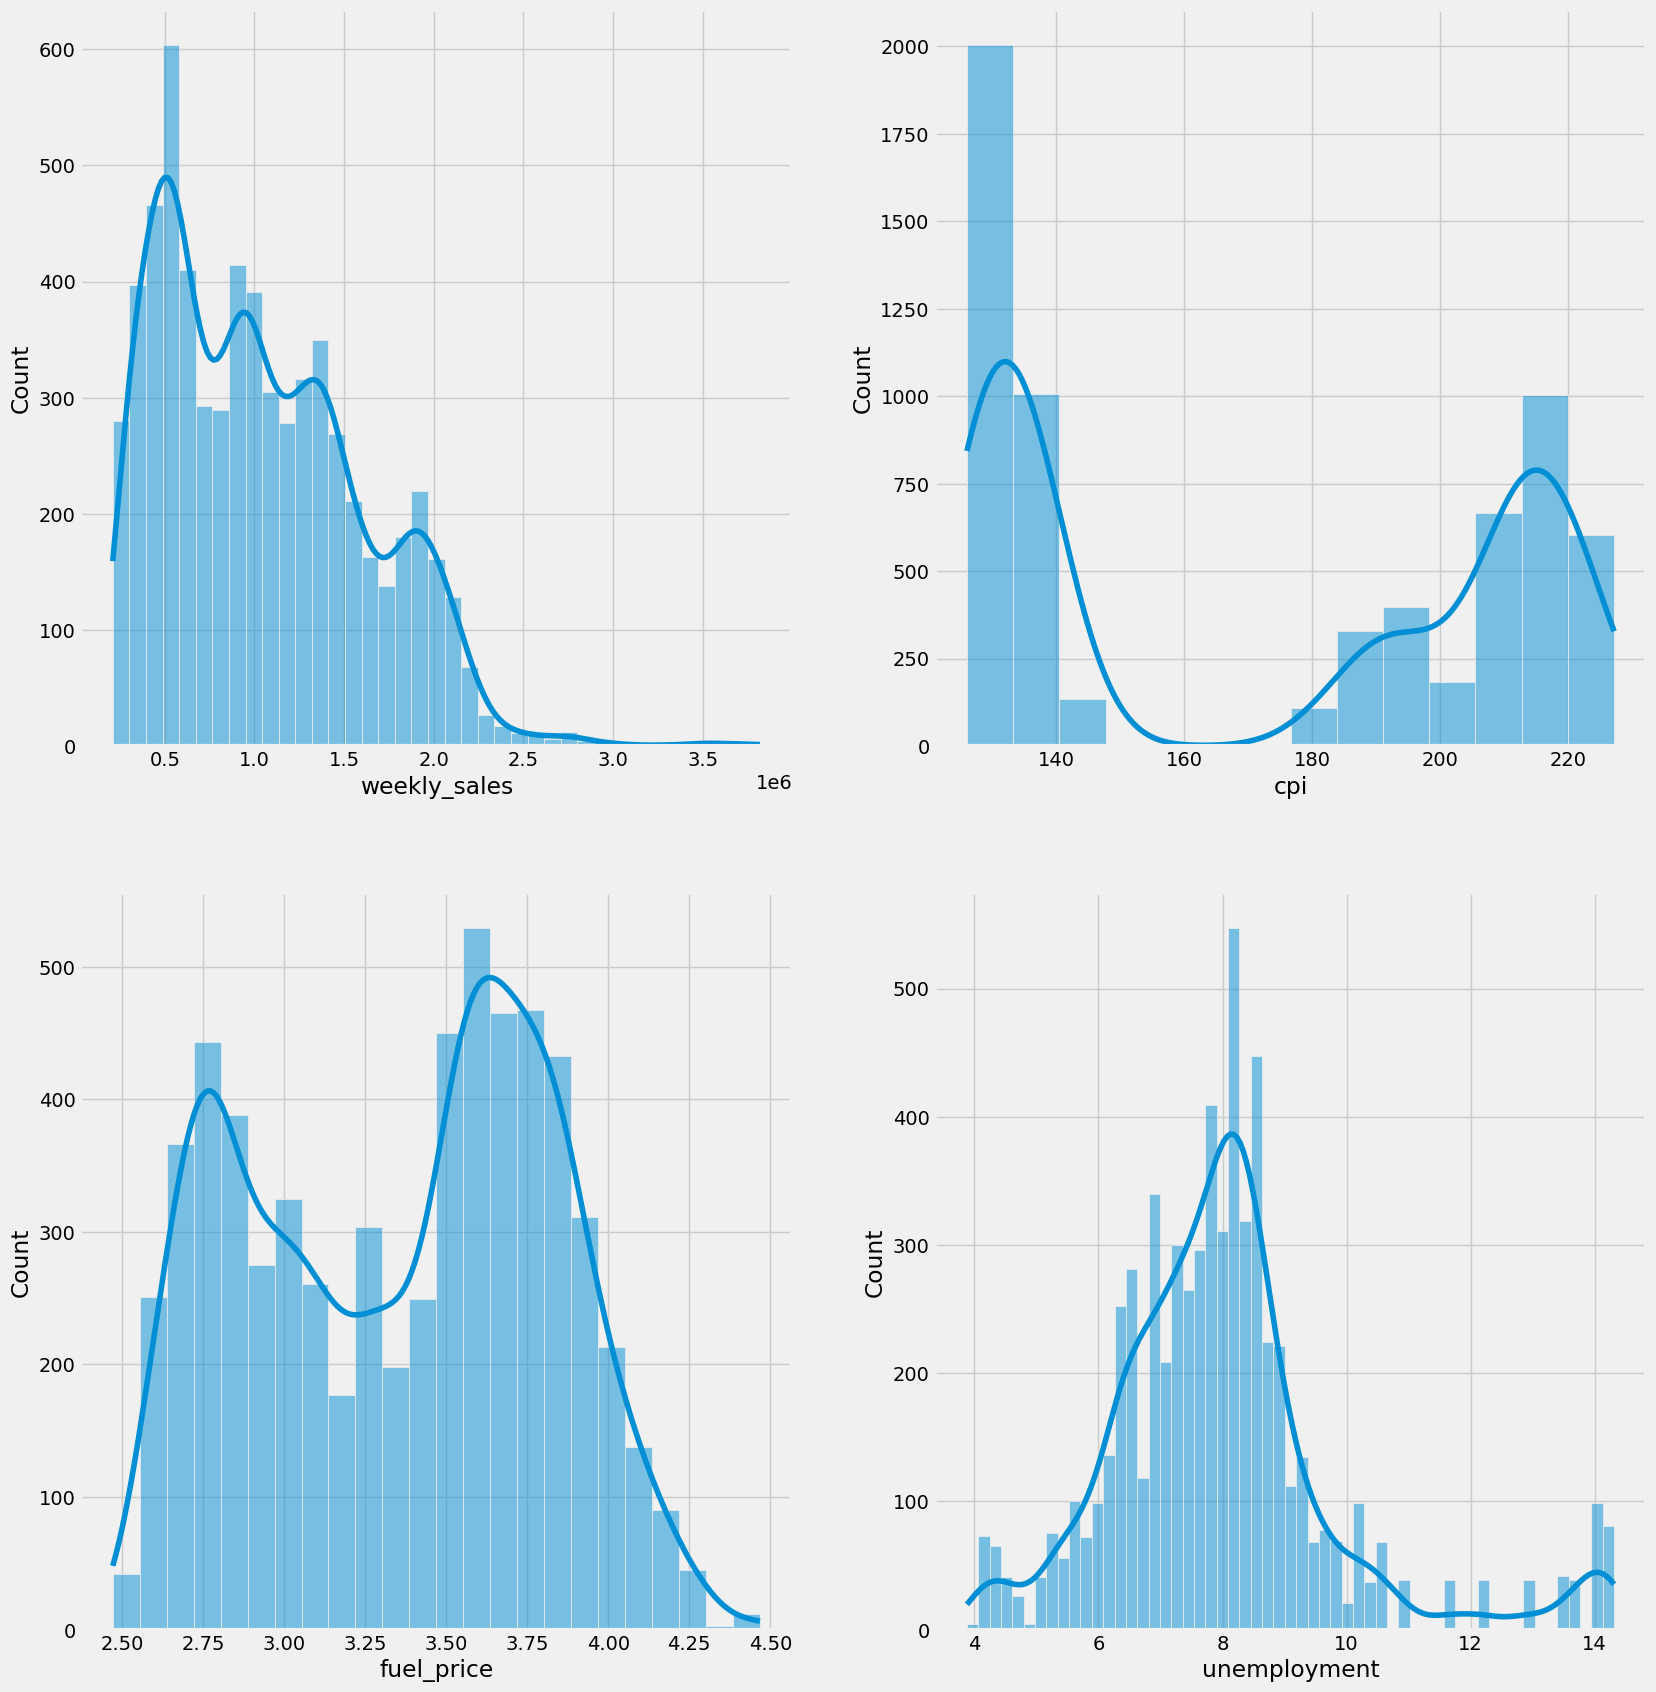

In [88]:
columns=['weekly_sales','cpi','fuel_price','unemployment']
plt.figure(figsize=(18,20))
for i,col in enumerate(columns):
  plt.subplot(2,2,i+1)
  sns.histplot(data=sales,x=col,kde=True)
plt.show()

#*2.weekly sales & stores*

<ipython-input-90-bb9bc077806d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=sales,x='store',y='weekly_sales',order=gb_store.index,ci=False)


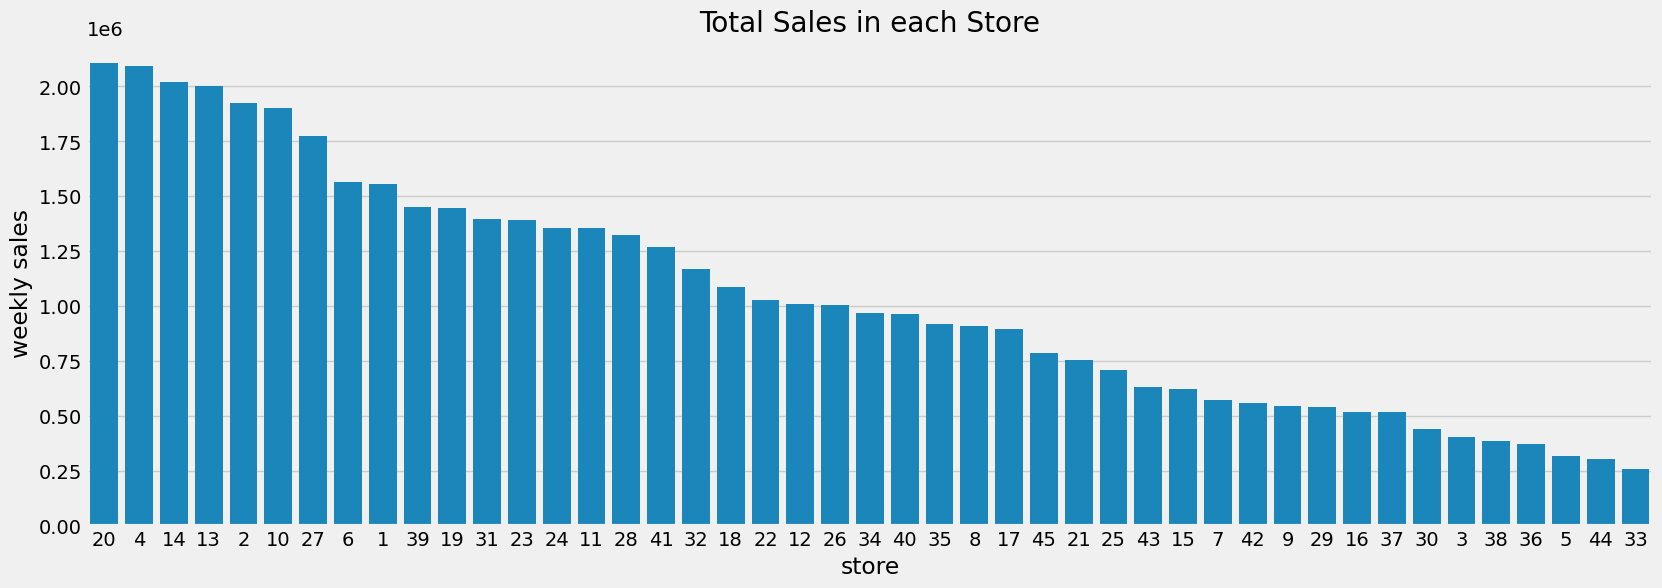

In [90]:
gb_store=sales.groupby('store')['weekly_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(data=sales,x='store',y='weekly_sales',order=gb_store.index,ci=False)
plt.xlabel('store')
plt.ylabel('weekly sales')
plt.title('Total Sales in each Store')
plt.show()

**conclusion:**Store No. 20 has the highest sales from any store with 301,397,792 followed by Store No. 4 with 299,543,953 and Store No. 33 comes last with 37,160,222$.

#*3.weekly sales & Tempearature*

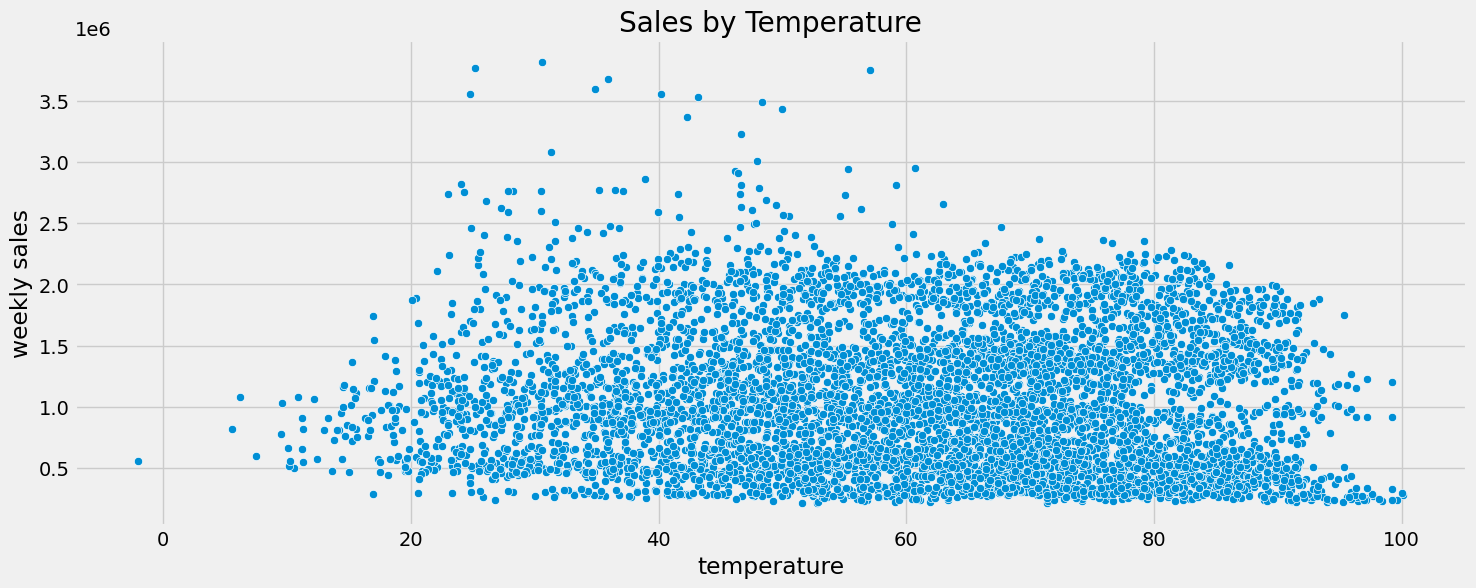

In [91]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=sales,x='temperature',y='weekly_sales')
plt.xlabel('temperature')
plt.ylabel('weekly sales')
plt.title('Sales by Temperature')
plt.show()

**Conclusion**: There re no relationship between Temperature and Sales


#*4.CPI & Sales*

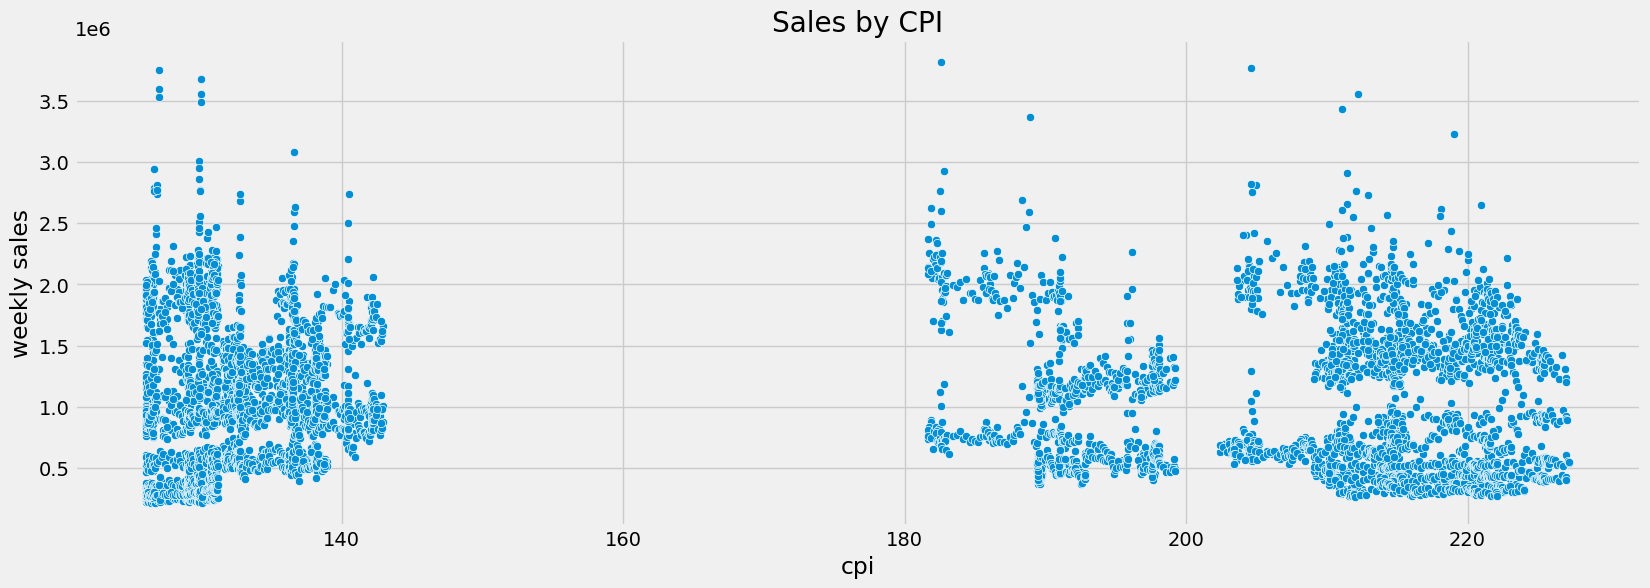

In [92]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=sales,x='cpi',y='weekly_sales')
plt.xlabel('cpi')
plt.ylabel('weekly sales')
plt.title('Sales by CPI')
plt.show()

**Conclusion**:Consumer Price Index (CPI) does not affect sales. And based on the distribution of average consumer prices in the above figure, customers can be divided into two categories:

customers who pay from 120 to 150 (Middle-class customers).

customers who pay from 180 to 230 (High-class customers).

#*5.Holiday vs sales*

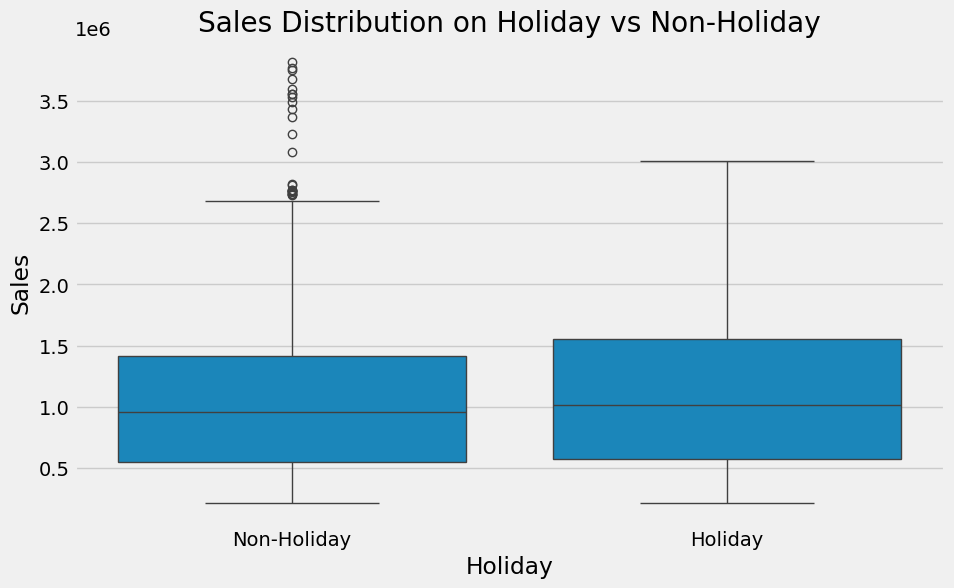

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is holiday', y='weekly_sales', data=sales)

plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.title('Sales Distribution on Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])  # Ajuster les étiquettes de l'axe des x

plt.show()

**Conculsion**:The sales number is the largest on a special holiday week


#*6.weekly sales vs date*

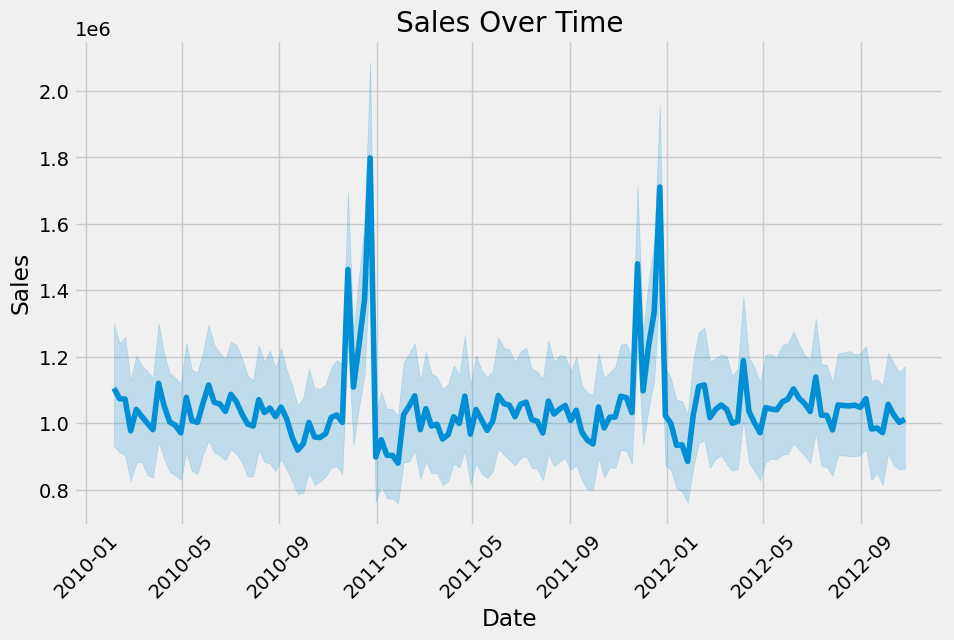

In [94]:
plt.figure(figsize=(10, 6))  # Ajustez la taille selon vos besoins
sns.lineplot(x='date', y='weekly_sales', data=sales)

# Définir les titres et labels
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.xticks(rotation=45)


plt.show()

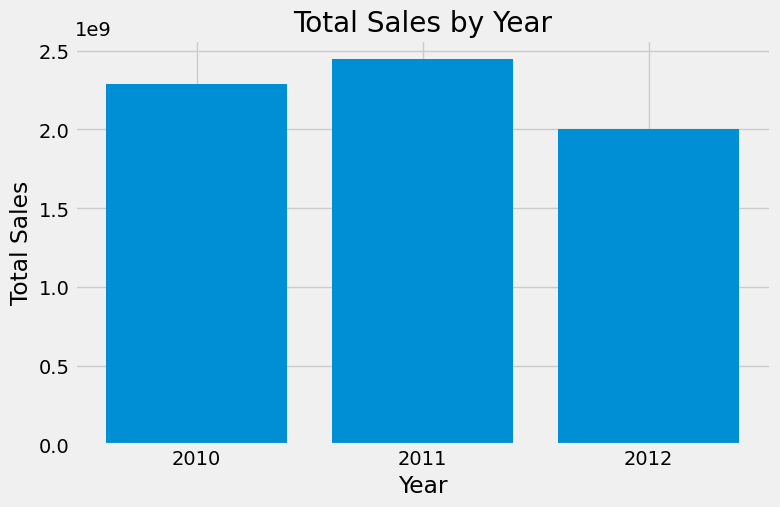

In [95]:
sales_by_year = sales.groupby('year')['weekly_sales'].sum().reset_index()
plt.figure(figsize=(8, 5))

plt.bar(sales_by_year['year'], sales_by_year['weekly_sales'])
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_by_year['year'])
plt.show()

**Conclusion**:The sales figures for 2011 exceeded those of both 2010 and 2012, indicating a peak in sales performance during this period."

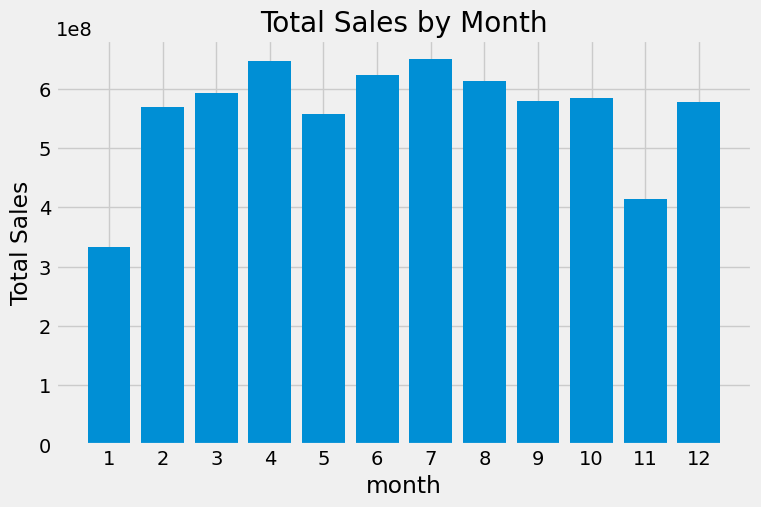

In [96]:
sales_by_month = sales.groupby('month')['weekly_sales'].sum().reset_index()
sales_by_month
plt.figure(figsize=(8,5))
plt.bar(sales_by_month['month'], sales_by_month['weekly_sales'])
plt.title('Total Sales by Month')
plt.xlabel('month')
plt.ylabel('Total Sales')
plt.xticks(sales_by_month['month'])
plt.show()


**Conclusion**:April and July are the most frequent in the dataset because most of the weekly sales were recorded in these months.

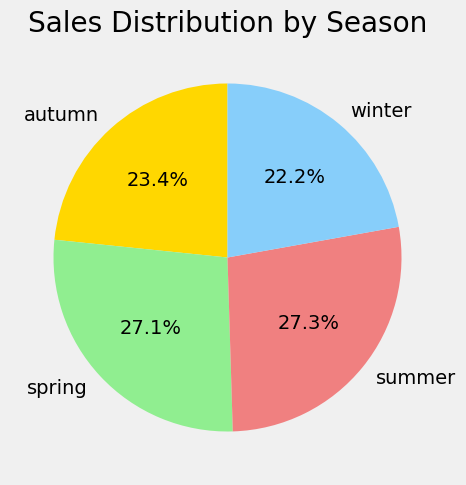

In [97]:
sales_by_season = sales.groupby('season')['weekly_sales'].sum()
sales_by_season
labels = sales_by_season.index
sizes = sales_by_season.values
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']  # Couleurs optionnelles pour chaque saison

# Créer le pie chart
plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Season')
plt.show()


**Conclusion**:Summer is the most frequent in the dataset because most of the weekly sales were recorded during this season.

# *7.Full price & temperature*

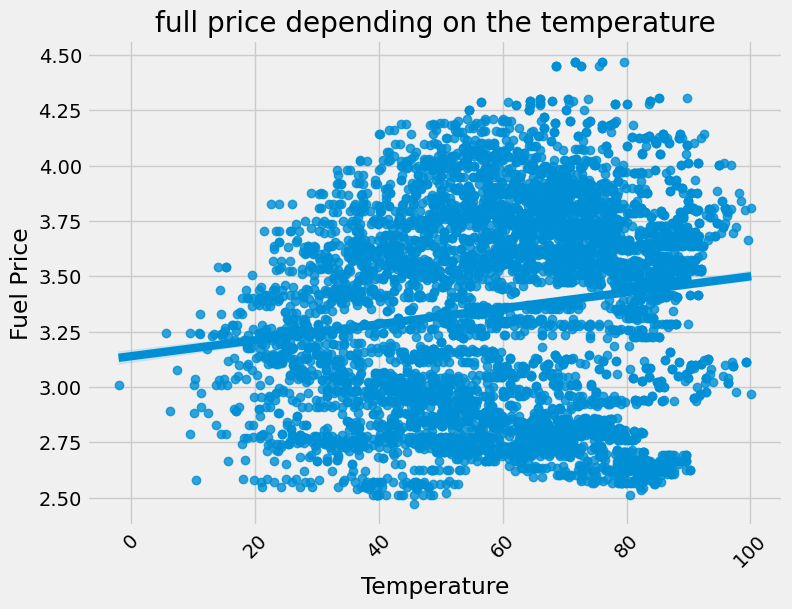

In [98]:
plt.figure(figsize=(8, 6))  # Ajustez la taille selon vos besoins
sns.regplot(x='temperature', y='fuel_price', data=sales)

# Définir les titres et labels
plt.title('full price depending on the temperature')
plt.xlabel('Temperature')
plt.ylabel('Fuel Price')

plt.xticks(rotation=45)

plt.show()

# Correlation


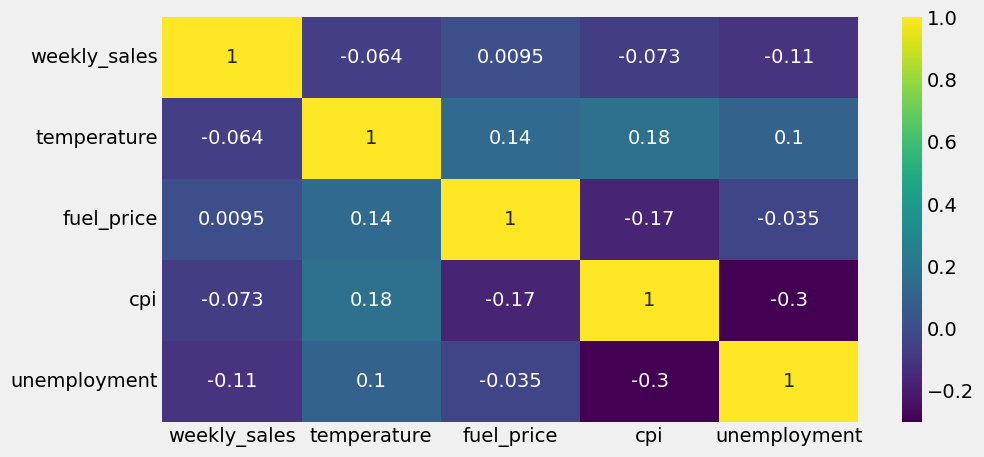

In [100]:
plt.figure(figsize = (10, 5))
sns.heatmap(sales[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr(), annot = True, cmap='viridis')
plt.show()

In [101]:
sales.columns

Index(['store', 'date', 'weekly_sales', 'is holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'quarter', 'season',
       'month', 'day'],
      dtype='object')

In [102]:
sales= sales.drop(['date',
        'year', 'quarter', 'season',
       'month', 'day'], axis=1)

#Baseline ML Models
Let's create three baseline models:

**Linear Regressor;**

**Decision Tree;**

**Random Forest .**

#1.Linear Regression

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Supposons que `sales` est votre DataFrame
X = sales.drop('weekly_sales', axis=1)  # Caractéristiques
y = sales['weekly_sales']  # Valeur cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du StandardScaler
scaler = StandardScaler()

# Ajustement du scaler sur les données d'entraînement et transformation de X_train et X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluation du modèle avec Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Évaluation du modèle avec R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 274455221280.6605
R^2 Score: 0.148063534059508


#2.Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor

# Création et entraînement du modèle d'Arbre de Décision
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test avec l'Arbre de Décision
dt_y_pred = dt_model.predict(X_test_scaled)

# Évaluation du modèle d'Arbre de Décision
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f"Decision Tree - Mean Squared Error: {dt_mse}")
print(f"Decision Tree - R^2 Score: {dt_r2}")

Decision Tree - Mean Squared Error: 34909153772.084
Decision Tree - R^2 Score: 0.8916384940509124


#3.Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor

# Création et entraînement du modèle de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test avec Random Forest
rf_y_pred = rf_model.predict(X_test_scaled)

# Évaluation du modèle Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R^2 Score: {rf_r2}")

Random Forest - Mean Squared Error: 21600260137.320145
Random Forest - R^2 Score: 0.9329506314402899


Here we find the best model is Random Forest with a accuraccy of arround 93.2%